In [1]:
from pishield.constraint_layer import build_pishield_layer
# To run this notebook the following are needed: pandas,  pytorch-lightning, scikit-learn
! pip install seaborn networkx

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import networkx as nx
import torch
from pishield.propositional_constraints.constraints_group import ConstraintsGroup
from pishield.propositional_constraints.clauses_group import ClausesGroup
from matplotlib.colors import ListedColormap

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [3]:
PATH_CONSTRAINTS = '../../data/propositional_constraints/custom_constraints/constraints_full_example.txt'

In [4]:
def custom_order():
  return "7,40,23,5,27,28,39,18,19,21,38,22,16,11,20,33,9,30,3,24,4,15,34,31,25,26,13,17,29,37,14,36,12,35,6,0,10,32,2,1,8"

def custom_order2():
  return "7,40,38,23,39,27,11,33,28,5,22,21,24,20,31,16,26,15,9,6,18,34,19,30,25,3,12,2,10,36,8,35,4,32,1,37,29,14,13,17,0"


ordering_choice = 'custom_order'
custom_order = custom_order2()
CL = build_pishield_layer(num_variables=len(custom_order), constraints_filepath=PATH_CONSTRAINTS, ordering_choice=ordering_choice, custom_ordering=custom_order)

constraints = CL.strata
centrality = CL.centrality
print(len(constraints))

lens = [len(group) for group in constraints]
print(lens)
print(sum(lens))

Using auto mode ::: Detected propositional constraints!
[<cloverd.propositional_constraints.constraint.Constraint object at 0x7fea61232e90>, <cloverd.propositional_constraints.constraint.Constraint object at 0x7fea61232fd0>, <cloverd.propositional_constraints.constraint.Constraint object at 0x7fea61233050>, <cloverd.propositional_constraints.constraint.Constraint object at 0x7fea612330d0>, <cloverd.propositional_constraints.constraint.Constraint object at 0x7fea61233150>, <cloverd.propositional_constraints.constraint.Constraint object at 0x7fea61233210>, <cloverd.propositional_constraints.constraint.Constraint object at 0x7fea61233290>, <cloverd.propositional_constraints.constraint.Constraint object at 0x7fea61233310>, <cloverd.propositional_constraints.constraint.Constraint object at 0x7fea61233390>, <cloverd.propositional_constraints.constraint.Constraint object at 0x7fea612331d0>, <cloverd.propositional_constraints.constraint.Constraint object at 0x7fea61233450>, <cloverd.propositio

In [5]:
def count_inner(pos, group_id):
    count = 0
    for node in pos:
        _, group_pos = pos[node]
        if group_pos == group_id:
            count +=1
    return  count

def pos_correction(pos, scale_y=0):
    pos_corr = {}
    for node in pos:
        inner_pos, group_pos = pos[node]
        count = count_inner(pos, group_pos)

        mid = count//2
        corrected_pos = inner_pos - mid
        if count % 2 == 0 and inner_pos >=mid:
            corrected_pos += 1
        pos_corr[node] = (corrected_pos, group_pos*scale_y)
    return pos_corr

def get_node_color(node):
    if node in range(0,10):
        return 0
    elif node in range(10,29):
        return 1
    elif node in range(29,41):
        return 2


centrality custom_order
17 num groupings
501 aux
297
end


/tmp/ipykernel_12045/3663626276.py:45: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


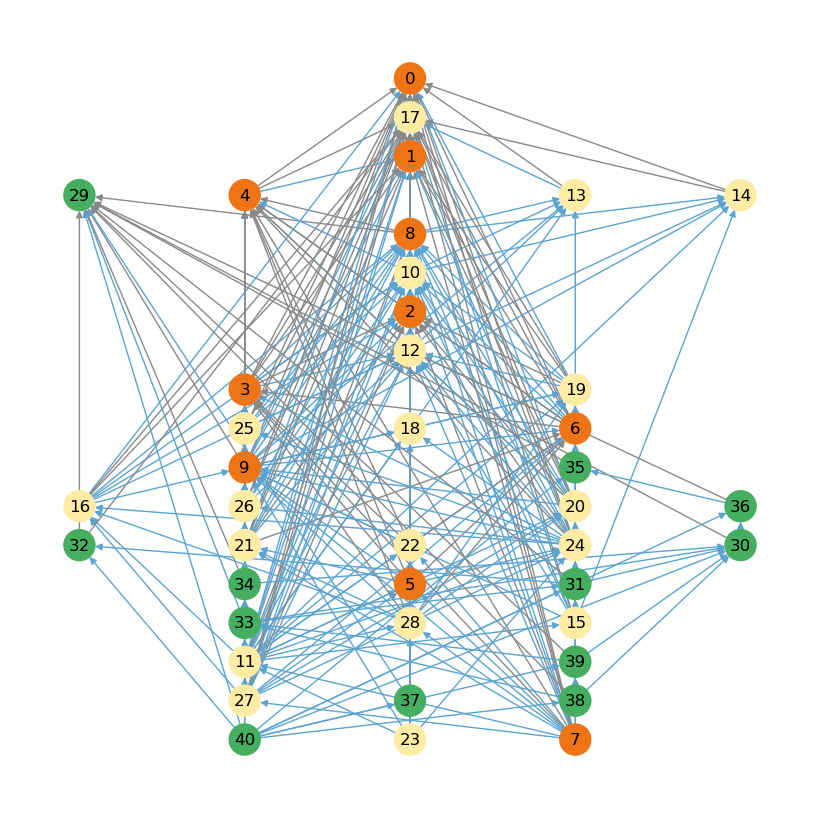

end plot


In [6]:
edge_palette = sns.color_palette("Greys", 10)
edge_palette2 = sns.color_palette("Blues", 10)
edge_palette = sns.color_palette([edge_palette[5], edge_palette2[5]])
edge_cmap = ListedColormap(edge_palette.as_hex())

node_palette = sns.color_palette("YlOrBr", 30)
node_palette2 = sns.color_palette("Greens", 30)
node_palette = sns.color_palette([node_palette[18], node_palette[5], node_palette2[18]])
node_cmap = ListedColormap(node_palette.as_hex())


constraints = CL.stratified_constraints
print("centrality", ordering_choice)
print(len(constraints), 'num groupings')


aux = ConstraintsGroup([])
for group in constraints:
  aux = aux + group 
print(len(aux), 'aux')

G = aux.graph()

plt.figure(figsize=(8, 8))
# ax = plt.subplot()

pos = dict()
for aid, atom in enumerate(aux.atoms().difference(aux.heads())):
  pos[atom] = (aid, -1)
for gid, group in enumerate(constraints):
  for aid, atom in enumerate(group.heads()):
    pos[atom] = (aid, gid)

#centrality = clauses.centrality(centrality)
centrality = {node: node for node in G.nodes()}

edge_color = [0 if G[edge[0]][edge[1]]['head'] else 1 for edge in G.edges()]
node_color = [get_node_color(node) for node in G.nodes()]

d = dict(G.degree)
print(len(G.edges))
print('end')
nx.draw(G, with_labels=True, pos=pos_correction(pos, scale_y=2), edge_color=edge_color, node_color=node_color,
        edge_cmap=edge_cmap, cmap=node_cmap, node_size=500) 
plt.tight_layout()
# plt.savefig('figs_strong_coherency_final_code_version/'+centr+'.png',format='png',dpi=500)
plt.show()

print('end plot')

